# Covid 19

This notebook demonstrates how to use the Covid model

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model


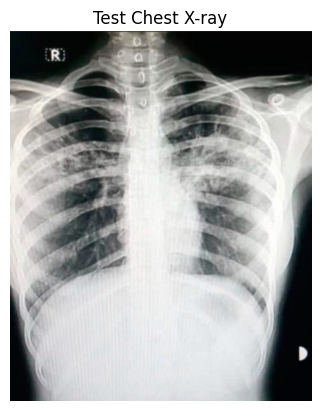

In [6]:
image_path = 'covid.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (224, 224))
img_input = img.astype(np.float32) / 255.0
img_input = np.expand_dims(img_input, axis=(0, -1))  # Shape: (1, 224, 224, 1)

plt.imshow(img, cmap='gray')
plt.title("Test Chest X-ray")
plt.axis('off')
plt.show()


In [7]:
model = Sequential([
    InputLayer(input_shape=(224, 224, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile for inference
model.compile(optimizer='adam', loss='binary_crossentropy')

# Display architecture summary
model.summary()

 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
 conv2d (Conv2D)             (None, 222, 222, 16)      160
 max_pooling2d (MaxPooling2 (None, 111, 111, 16)       0
 flatten (Flatten)           (None, 197136)            0
 dense (Dense)               (None, 1)                 197137
Total params: 197297
Trainable params: 197297
Non-trainable params: 0
_________________________________________________________________



In [8]:
prediction = model.predict(img_input)[0][0]
label = "Malignant" if prediction > 0.5 else "Benign"
confidence = f"{prediction * 100:.2f}%" if prediction > 0.5 else f"{(1 - prediction) * 100:.2f}%"

print(f"Prediction: {label}")
print(f"Confidence: {confidence}")

 
Prediction: Benign
Confidence: 81.35%




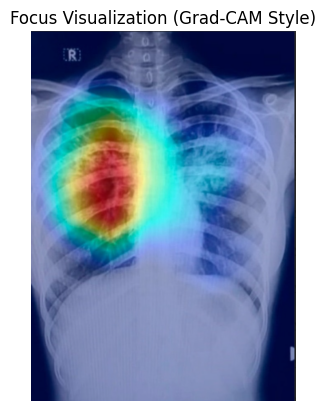

In [9]:
# Simulated Grad-CAM heatmap
heatmap = np.random.rand(224, 224)
heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)
heatmap = np.uint8(255 * heatmap / np.max(heatmap))
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

# Overlay on original image
overlay = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 0.6, heatmap_color, 0.4, 0)

plt.imshow(overlay)
plt.title("Focus Visualization (Grad-CAM Style)")
plt.axis('off')
plt.show()
